In [82]:
%pylab inline

from __future__ import print_function
from __future__ import division

import sklearn
import numpy
import scipy
import pandas
import matplotlib
import seaborn

import json

from matplotlib import pyplot
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [112]:
rcParams['figure.figsize'] = 15, 8

In [74]:
linesep = '\r\n'
bodysep = linesep * 2 

def valid(msg):
    return bodysep in msg

def get_messages(msg):
    return [
        {
            x.split(':')[0]: x.split(':')[1]
            for x in k.split(bodysep)[0].split(linesep) + [u'message:{}'.format(k.split(bodysep)[1])]
            if ':' in x
        }
        for k in [x.replace('\n\r\t', '') for x in msg]
    ]

In [65]:
ham_json = json.load(open('ham_txt.json'))
ham = get_messages(ham_json)

In [75]:
spam_json = json.load(open('spam_txt.json'))
spam = get_messages(x for x in spam_json if valid(x))

In [161]:
def key_barplot(p, limit = 0):
    from operator import itemgetter
    keys = __builtin__.sum((Counter(x.keys()) for x in p), Counter())
    vals = sorted(((x, y) for x, y in keys.iteritems() if y > limit), key = itemgetter(1))
    pyplot.xticks(rotation = 90)
    seaborn.barplot(map(itemgetter(0), vals), map(itemgetter(1), vals))

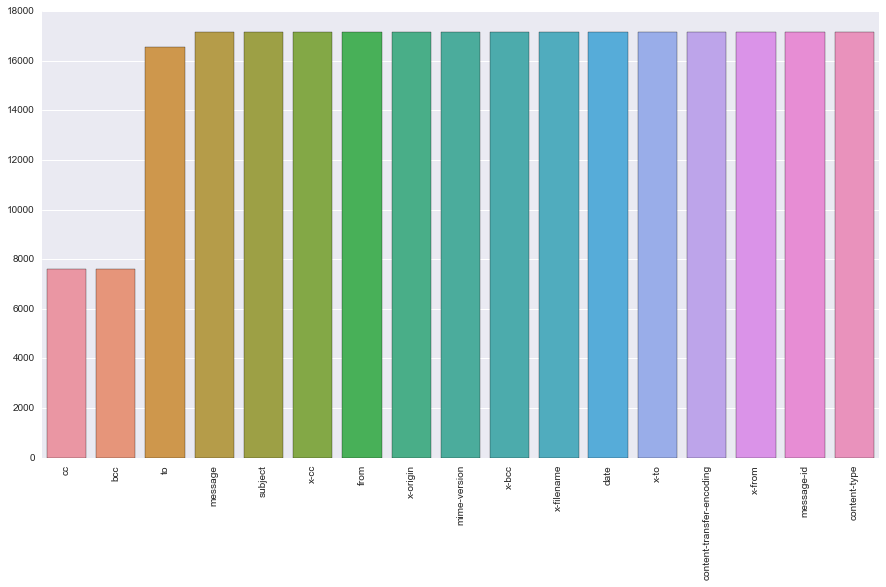

In [158]:
key_barplot(ham, limit = 5)

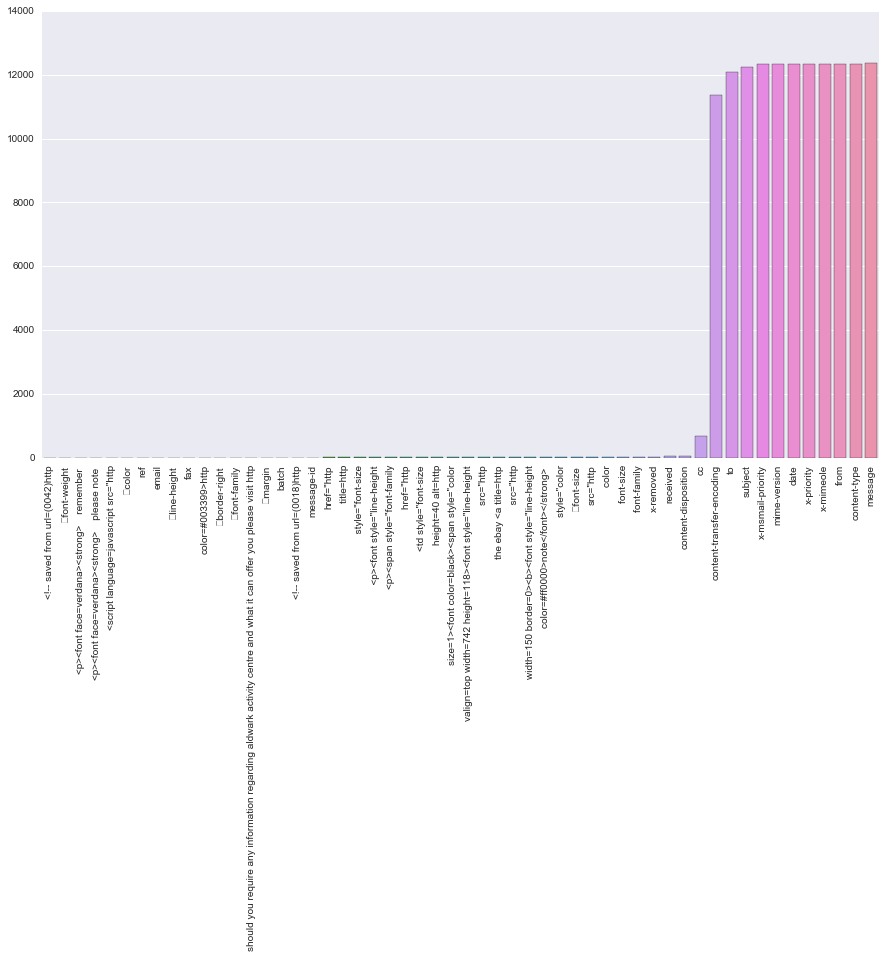

In [160]:
key_barplot(spam, limit = 0)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

